In [6]:
%matplotlib inline
import datetime 
import daily
import pandas as pd
import numpy as np
from scipy.stats import norm
from pandas import Series
from matplotlib import pyplot
import matplotlib.pyplot as plt 
import texttable as tt
import scipy.stats
tab = tt.Texttable()
headings = ['Stock', 'mean returns', 'VaR', 'Vol90', 'Vol_annual']
my_list = ["AAPL", "GOOGL", "MSFT", "IBM", "INTC"]
mean_returns = []
VaR = []
Vol90 = []
Vol_annual = []

alyzing ticker: AAPL


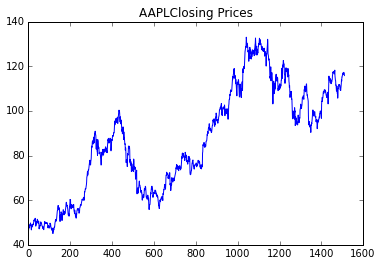

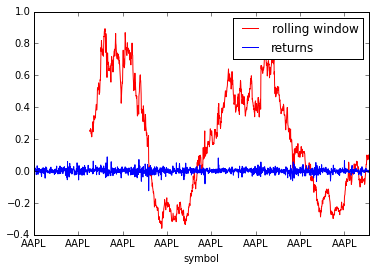

c:\python27\lib\site-packages\pandas\core\index.py:805: FutureWarning: scalar indexers for index type Index should be integers and not floating point
  type(self).__name__),FutureWarning)


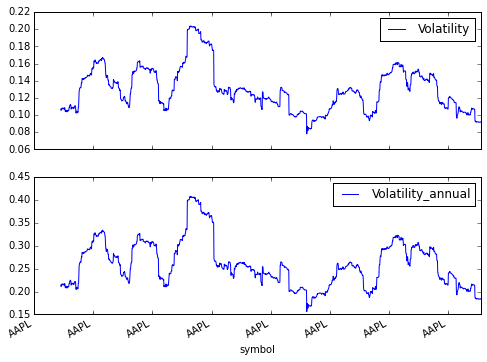

alyzing ticker: GOOGL


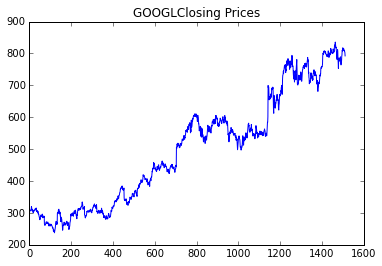

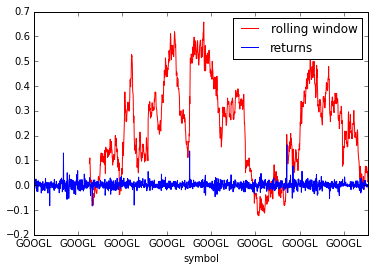

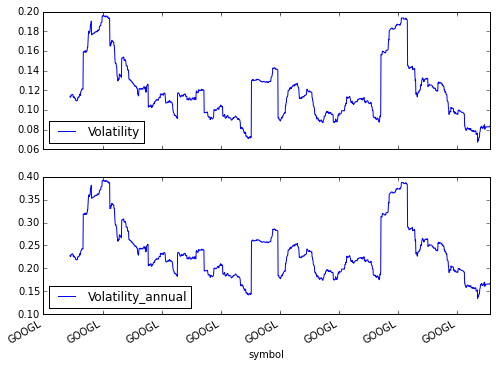

alyzing ticker: MSFT


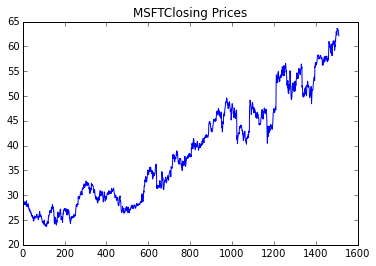

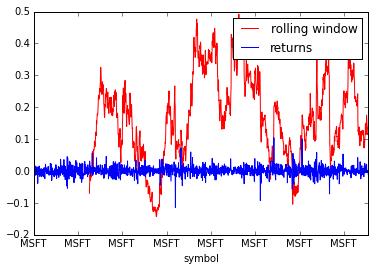

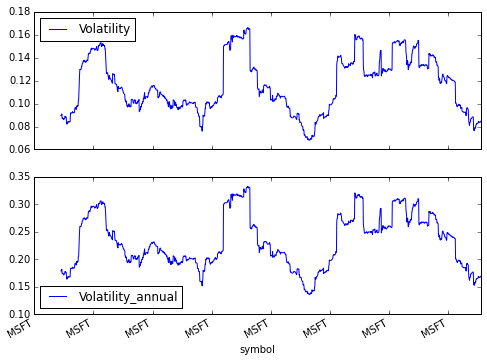

alyzing ticker: IBM


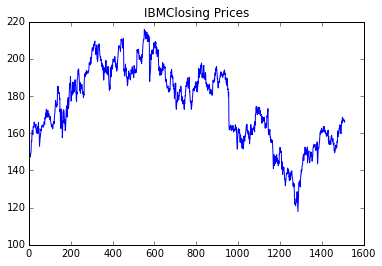

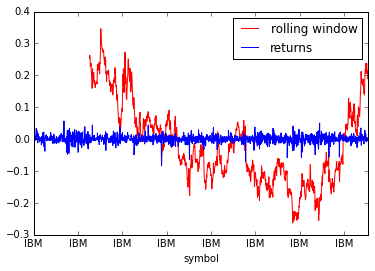

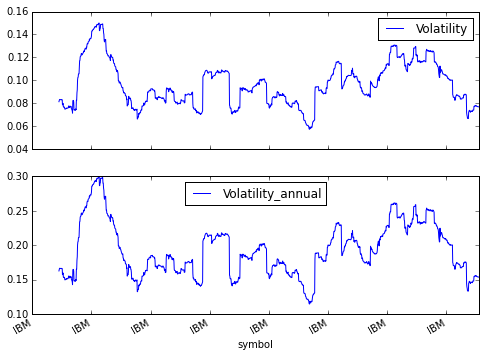

alyzing ticker: INTC


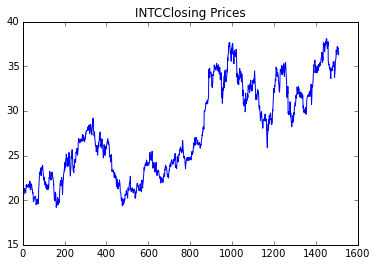

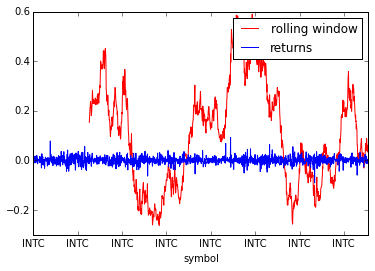

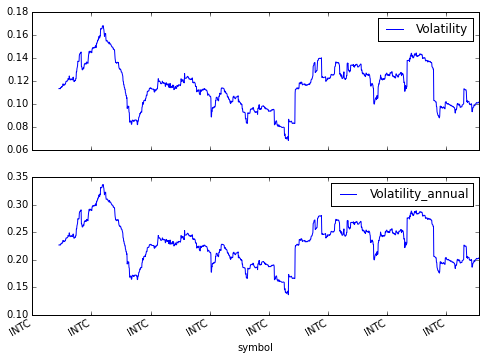

In [7]:
for i in range(len(my_list)):
    start = datetime.datetime(2011,1,1) 
    end = datetime.datetime(2016,12,31) 
    ticker = my_list[i]
    print('alyzing ticker: '+ticker)
    ydr=daily.YahooDailyReader(ticker,start,end)
    f = ydr.read()
    f = f.iloc[::-1]
    plt.plot(f['close'].values) 
    plt.title(my_list[i] + 'Closing Prices') 
    plt.show()
    
    series = Series(f.close)
    #Compute returns
    tmp = (series - series.shift(1))/series.shift(1)
    #Compute rolling window returns
    rolling = pd.rolling_apply(tmp, 252, lambda x: np.prod(1 + x) - 1)
    # plot rolling window and returns dataset
    rolling.plot(color='red', label = 'rolling window')
    tmp.plot(label = 'returns')
    pyplot.legend()
    pyplot.show()
    # compute VaR
    rolling.sort()
    rolling_mean = np.mean(rolling)
    mean_returns.append(rolling_mean)
    VaR.append(-rolling[round(np.sqrt(252*5) * norm.ppf(0.95, loc = np.mean(rolling), scale = np.std(rolling)), 0)])
    # Compute the logarithmic returns using the Closing price 
    f['log_ret'] = np.log(f.close / f.close.shift(1))
    # Compute Volatility using the pandas rolling standard deviation function
    f['Volatility'] = pd.rolling_std(f.log_ret, window=90) * np.sqrt(252/4)
    f['Volatility_annual'] = f.Volatility* np.sqrt(4)
    Vol90.append(np.mean(f.Volatility))
    Vol_annual.append(np.mean(f.Volatility_annual))
    # Plot the Volatility
    f[['Volatility', 'Volatility_annual']].plot(subplots=True, color='blue',figsize=(8, 6))
    plt.show()

Таблица результатов средних параметров для рассматриваемых акций.

In [8]:
tab.header(headings)
for row in zip(my_list,mean_returns,VaR,Vol90,Vol_annual):
    tab.add_row(row)

s = tab.draw()
print (s)

+-------+--------------+-------+-------+------------+
| Stock | mean returns |  VaR  | Vol90 | Vol_annual |
+=======+==============+=======+=======+============+
| AAPL  | 0.200        | 0.306 | 0.130 | 0.260      |
+-------+--------------+-------+-------+------------+
| GOOGL | 0.232        | 0.094 | 0.119 | 0.238      |
+-------+--------------+-------+-------+------------+
| MSFT  | 0.170        | 0.122 | 0.116 | 0.232      |
+-------+--------------+-------+-------+------------+
| IBM   | -0.017       | 0.249 | 0.097 | 0.193      |
+-------+--------------+-------+-------+------------+
| INTC  | 0.105        | 0.231 | 0.116 | 0.231      |
+-------+--------------+-------+-------+------------+


MSFT


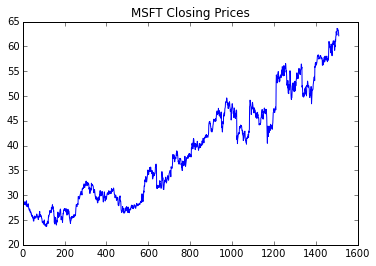

0.174134136732
0.030285379001


In [9]:
#3
start = datetime.datetime(2011,1,1) 
end = datetime.datetime(2016,12,31) 
ticker = "MSFT"
print(ticker)
ydr=daily.YahooDailyReader(ticker,start,end)
f = ydr.read()
f = f.iloc[::-1]
plt.plot(f['close'].values) 
plt.title('MSFT Closing Prices') 
plt.show()
series = Series(f.close)
f['log_ret'] = np.log(f.close / f.close.shift(1))
f['Volatility'] = pd.rolling_std(f.log_ret, window=90) * np.sqrt(252/4)
#compute expected price
expected_price = f.close.tail(1)*np.exp((0.05+np.std(f.close)/2)*0.5)
#compute confidense interval (1st)
CI_R1 = f.close.tail(1)*np.exp((0.05*np.std(f.close)/2)*0.5)+0.39*np.std(f.close)*np.sqrt(0.5)
prob_1 = (1 - scipy.stats.norm(0, 1).cdf(0.39))/2
print(prob_1)
#compute confidense interval (2st)
CI_R2 = f.close.tail(1)*np.exp((0.009773*np.std(f.close)/2)*0.5)+1.55*np.std(f.close)*np.sqrt(0.5)
prob_2 = (1- scipy.stats.norm(0, 1).cdf(1.55))/2
print(prob_2)

prob_1 и prob_2 вероятности роста акции компании Майкрософт не менее, чем на 20%, расчитанные при разных средних доходностях: prob_1 при значение равным 0.05, prob_2 при равном ставке LIBOR 3M на 31.12.2016 (0.009773).